In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_curve, auc
import umap
import matplotlib.pyplot as plt

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
change_df = pd.read_csv('../datasets/group_people.csv')
bots_df = pd.read_csv('../datasets/bots.csv')
users_df = pd.read_csv('../datasets/users.csv')
data = pd.concat([bots_df, users_df, change_df])
data = data.fillna(0)


source_features = ['has_photo','has_mobile','is_friend','can_post','can_see_all_posts',
            'can_see_audio','can_write_private_message','can_send_friend_request',
            'can_be_invited_group','followers_count','blacklisted','blacklisted_by_me',
            'is_favorite','is_hidden_from_feed','common_count','university','faculty',
            'graduation','relation','verified','deactivated','friend_status','can_access_closed',
            'is_closed', 'city_id','country_id','last_seen_platform','last_seen_time',
            'interests_bool', 'books_bool', 'tv_bool', 'quotes_bool', 'about_bool',
            'games_bool', 'movies_bool', 'activities_bool', 'music_bool', 'mobile_phone_bool',
            'home_phone_bool', 'site_bool', 'status_bool', 'university_bool',
            'university_name_bool', 'faculty_bool', 'faculty_name_bool', 'graduation_bool',
            'home_town_bool', 'relation_bool', 'personal_bool', 'universities_bool',
            'schools_bool', 'occupation_bool', 'education_form_bool', 'education_status_bool',
            'relation_partner_bool', 'skype_bool', 'twitter_bool', 'livejournal_bool',
            'instagram_bool', 'facebook_bool', 'facebook_name_bool', 'relatives_in_friends_bool',
            'change_nickname_bool', 'partner_in_friends_bool', 'partner_in_friends_bool',
            'posts_count', 'users_subscriptions_count', 'groups_subscriptions_count',
            'albums_count', 'audios_count', 'gifts_count', 'pages_count', 'photos_count',
            'subscriptions_count', 'videos_count', 'video_playlists_count', 'subscriptions_followers_coef',
            'subscriptions_followers_coef_norm', 'friends_count']


In [3]:
class Result:
    def __init__(self, selected_features_len, clf, accuracy, precision, recall, auc, f1, fpr, tpr):
        self.selected_features_len = selected_features_len
        self.clf = clf
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.auc = auc
        self.f1 = f1
        self.fpr = fpr
        self.tpr = tpr
    
    @property
    def metrics_sum(self):
        return self.accuracy + self.precision + self.recall + self.auc + self.f1

In [4]:
X, y = data[source_features], data[["bots"]].values.flatten()

clfs = [
    DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10),
    RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20),
    LogisticRegression(random_state=0, max_iter=1000, solver='saga'),
    svm.SVC(probability=True),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    HistGradientBoostingClassifier()
]
# features_numbers = list(range(2, 7))
features_numbers = list(range(10, 50, 5))
results = []
for features_number in features_numbers:
    for clf in clfs:
        # Разделение данных на train и test
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y)
        embed = umap.UMAP(
            n_neighbors=30,  # маленькое значение n_neighbors
            n_components=features_number,
        )

        Xtrain = embed.fit_transform(Xtrain)
        Xtest = embed.fit_transform(Xtest)
            
    
        clf.fit(Xtrain, Ytrain)
        y_pred_test = clf.predict(Xtest)
    
        # Вычисляем метрики
        test_accuracy = accuracy_score(y_pred_test, Ytest)
        test_precision = precision_score(y_pred_test, Ytest)
        test_recall = recall_score(y_pred_test, Ytest)
        test_f1 = f1_score(y_pred_test, Ytest)

        y_pred_test = clf.predict(Xtest)
        y_true = Ytest
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_test)
        test_auc = auc(fpr, tpr)
            
        print(f"clf {clf.__class__.__name__}")
        print(f"F1 score: {test_f1}")
        print(f"Recall score: {test_recall}")
        print(f"Precision score: {test_precision}")
        print(f"Accuracy score: {test_accuracy}")
        print(f"Auc score: {test_auc}")

        result = Result(features_number, clf, test_accuracy, test_precision, test_recall, test_auc, test_f1, fpr, tpr)
        results.append(result)
    

clf DecisionTreeClassifier
F1 score: 0.27327690447400244
Recall score: 0.17823343848580442
Precision score: 0.5854922279792746
Accuracy score: 0.17179604960955444
Auc score: 0.3036973029758701
clf RandomForestClassifier
F1 score: 0.4971751412429379
Recall score: 0.47900466562986005
Precision score: 0.5167785234899329
Accuracy score: 0.7138263665594855
Auc score: 0.6524436576968956
clf LogisticRegression
F1 score: 0.3768953068592058
Recall score: 0.3246268656716418
Precision score: 0.44922547332185886
Accuracy score: 0.6035829122645843
Auc score: 0.5544999547060422
clf SVC
F1 score: 0.408695652173913
Recall score: 0.6045016077170418
Precision score: 0.30870279146141216
Accuracy score: 0.7501148369315572
Auc score: 0.6151294569551958
clf MLPClassifier
F1 score: 0.5258103241296519
Recall score: 0.8795180722891566
Precision score: 0.375
Accuracy score: 0.8185576481396417
Auc score: 0.6780838041431262
clf GaussianNB
F1 score: 0.4175030108390205
Recall score: 0.2711157455683003
Precision sco

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


clf SVC
F1 score: 0.0
Recall score: 0.0
Precision score: 0.0
Accuracy score: 0.7303628847037207
Auc score: 0.5


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.5534041224234854
Recall score: 0.4381800197823937
Precision score: 0.7508474576271187
Accuracy score: 0.6715663757464401
Auc score: 0.69646972755332
clf GaussianNB
F1 score: 0.5082146768893757
Recall score: 0.6966966966966966
Precision score: 0.4
Accuracy score: 0.793752870923289
Auc score: 0.6683782091421414
clf AdaBoostClassifier
F1 score: 0.17683970336565885
Recall score: 0.13501742160278746
Precision score: 0.256198347107438
Accuracy score: 0.3371612310519063
Auc score: 0.3122594788972305
clf GradientBoostingClassifier
F1 score: 0.5312800769971127
Recall score: 0.6133333333333333
Precision score: 0.4685908319185059
Accuracy score: 0.7762976573265963
Auc score: 0.6795095217527038
clf HistGradientBoostingClassifier
F1 score: 0.21348314606741572
Recall score: 0.6551724137931034
Precision score: 0.12751677852348994
Accuracy score: 0.7427652733118971
Auc score: 0.5511081678828709
clf DecisionTreeClassifier
F1 score: 0.30512249443207123
Recall score: 0.45514

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


clf LogisticRegression
F1 score: 0.2869379014989293
Recall score: 0.3850574712643678
Precision score: 0.22866894197952217
Accuracy score: 0.6940744143316491
Auc score: 0.5470811711783218
clf SVC
F1 score: 0.1451398135818908
Recall score: 0.11964873765093303
Precision score: 0.1844331641285956
Accuracy score: 0.41019751952227834
Auc score: 0.33937925545647935


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.5230414746543779
Recall score: 0.850187265917603
Precision score: 0.3777038269550749
Accuracy score: 0.8098300413412953
Auc score: 0.6761615581475883
clf GaussianNB
F1 score: 0.2265135699373695
Recall score: 0.16206123973114264
Precision score: 0.37608318890814557
Accuracy score: 0.31924666972898486
Auc score: 0.3374165944540728
clf AdaBoostClassifier
F1 score: 0.2400662251655629
Recall score: 0.22445820433436534
Precision score: 0.2580071174377224
Accuracy score: 0.5783187873220027
Auc score: 0.47389519958573423
clf GradientBoostingClassifier
F1 score: 0.5796296296296296
Recall score: 0.627254509018036
Precision score: 0.5387263339070568
Accuracy score: 0.7914561322921452
Auc score: 0.7110924902617991
clf HistGradientBoostingClassifier
F1 score: 0.5214521452145214
Recall score: 0.713855421686747
Precision score: 0.41074523396880414
Accuracy score: 0.8001837390904915
Auc score: 0.6756851169844021
clf DecisionTreeClassifier
F1 score: 0.45430613012410676
Rec

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.2978313253012048
Recall score: 0.2087837837837838
Precision score: 0.519327731092437
Accuracy score: 0.3307303628847037
Auc score: 0.3895627277459657
clf GaussianNB
F1 score: 0.31004784688995213
Recall score: 0.37850467289719625
Precision score: 0.2625607779578606
Accuracy score: 0.6688102893890675
Auc score: 0.54602397872252


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


clf AdaBoostClassifier
F1 score: 0.0
Recall score: 0.0
Precision score: 0.0
Accuracy score: 0.7207165824529168
Auc score: 0.5
clf GradientBoostingClassifier
F1 score: 0.4312925170068027
Recall score: 0.36353211009174313
Precision score: 0.5301003344481605
Accuracy score: 0.6159853008727607
Auc score: 0.5893060253621423
clf HistGradientBoostingClassifier
F1 score: 0.3021390374331551
Recall score: 0.795774647887324
Precision score: 0.18646864686468648
Accuracy score: 0.7602204869085898
Auc score: 0.5840045334896317
clf DecisionTreeClassifier
F1 score: 0.5641025641025641
Recall score: 0.9201520912547528
Precision score: 0.40672268907563025
Accuracy score: 0.8282039503904456
Auc score: 0.6967241763962222
clf RandomForestClassifier
F1 score: 0.5467625899280576
Recall score: 0.9047619047619048
Precision score: 0.3917525773195876
Accuracy score: 0.8263665594855305
Auc score: 0.688352777688007
clf LogisticRegression
F1 score: 0.440589765828274
Recall score: 0.2977725674091442
Precision score: 

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.56071076011846
Recall score: 0.696078431372549
Precision score: 0.46942148760330576
Accuracy score: 0.7955902618282039
Auc score: 0.6952705402393119
clf GaussianNB
F1 score: 0.46010844306738957
Recall score: 0.30045523520485584
Precision score: 0.9818181818181818
Accuracy score: 0.3596692696371153
Auc score: 0.5510235947258848
clf AdaBoostClassifier
F1 score: 0.5105263157894737
Recall score: 0.5141342756183745
Precision score: 0.5069686411149826
Accuracy score: 0.7436839687643546
Auc score: 0.6677076518113902
clf GradientBoostingClassifier
F1 score: 0.5383153894870171
Recall score: 0.4408713692946058
Precision score: 0.6910569105691057
Accuracy score: 0.6651355075792375
Auc score: 0.6729932440169473
clf HistGradientBoostingClassifier
F1 score: 0.2940663176265271
Recall score: 0.1983519717480871
Precision score: 0.5682967959527825
Accuracy score: 0.25677537896187413
Auc score: 0.3542241555521488
clf DecisionTreeClassifier
F1 score: 0.5283018867924528
Recall

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


clf LogisticRegression
F1 score: 0.49526216045483257
Recall score: 0.386969397828233
Precision score: 0.6877192982456141
Accuracy score: 0.6329811667432246
Auc score: 0.6506424742628194
clf SVC
F1 score: 0.22121212121212122
Recall score: 0.9240506329113924
Precision score: 0.12564543889845095
Accuracy score: 0.7638952687184198
Auc score: 0.5609430202011051


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.4788895315211104
Recall score: 0.37398373983739835
Precision score: 0.6655948553054662
Accuracy score: 0.5861276986678916
Auc score: 0.609967845659164
clf GaussianNB
F1 score: 0.5582468281430218
Recall score: 0.8642857142857143
Precision score: 0.4122657580919932
Accuracy score: 0.8240698208543867
Auc score: 0.6941831935114054
clf AdaBoostClassifier
F1 score: 0.30253807106598984
Recall score: 0.37721518987341773
Precision score: 0.25254237288135595
Accuracy score: 0.6844281120808452
Auc score: 0.5487664605427575
clf GradientBoostingClassifier
F1 score: 0.5098572399728076
Recall score: 0.43859649122807015
Precision score: 0.6087662337662337
Accuracy score: 0.6688102893890675
Auc score: 0.6506355191893307
clf HistGradientBoostingClassifier
F1 score: 0.43602693602693604
Recall score: 0.43898305084745765
Precision score: 0.4331103678929766
Accuracy score: 0.692237023426734
Auc score: 0.6117420110522515
clf DecisionTreeClassifier
F1 score: 0.530209617755857
Rec

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.4066225165562914
Recall score: 0.33117583603020495
Precision score: 0.5265866209262435
Accuracy score: 0.5884244372990354
Auc score: 0.5688140130980026
clf GaussianNB
F1 score: 0.43381294964028777
Recall score: 0.27698667891593937
Precision score: 1.0
Accuracy score: 0.27698667891593937
Auc score: 0.5
clf AdaBoostClassifier
F1 score: 0.24478442280945756
Recall score: 0.6567164179104478
Precision score: 0.15042735042735042
Accuracy score: 0.7505741846577859
Auc score: 0.5607664390327706
clf GradientBoostingClassifier
F1 score: 0.450381679389313
Recall score: 0.885
Precision score: 0.30204778156996587
Accuracy score: 0.8015617822691777
Auc score: 0.6437957323940339
clf HistGradientBoostingClassifier
F1 score: 0.1932479627473807
Recall score: 0.15132178669097537
Precision score: 0.2673107890499195
Accuracy score: 0.3633440514469453
Auc score: 0.334490870103366
clf DecisionTreeClassifier
F1 score: 0.4615384615384615
Recall score: 0.5170212765957447
Precision s

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


clf LogisticRegression
F1 score: 0.4307692307692307
Recall score: 0.9545454545454546
Precision score: 0.2781456953642384
Accuracy score: 0.7960496095544327
Auc score: 0.6365299360482986
clf SVC
F1 score: 0.2882305844675741
Recall score: 0.189873417721519
Precision score: 0.5980066445182725
Accuracy score: 0.1832797427652733
Auc score: 0.3113842746400886


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/umap-kGiDv-CM-py3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


clf MLPClassifier
F1 score: 0.43268538516918653
Recall score: 0.2760679834634819
Precision score: 1.0
Accuracy score: 0.2760679834634819
Auc score: 0.5
clf GaussianNB
F1 score: 0.4213197969543147
Recall score: 0.26688102893890675
Precision score: 1.0
Accuracy score: 0.26688102893890675
Auc score: 0.5
clf AdaBoostClassifier
F1 score: 0.43111111111111106
Recall score: 0.2759601706970128
Precision score: 0.9847715736040609
Accuracy score: 0.2944418925126321
Auc score: 0.5109860390088401
clf GradientBoostingClassifier
F1 score: 0.4287260916636593
Recall score: 0.27285254937988057
Precision score: 1.0
Accuracy score: 0.27285254937988057
Auc score: 0.5
clf HistGradientBoostingClassifier
F1 score: 0.25688073394495414
Recall score: 0.26057529610829105
Precision score: 0.2532894736842105
Accuracy score: 0.5907211759301791
Auc score: 0.48738406125255784


# Plot graphs of metrics

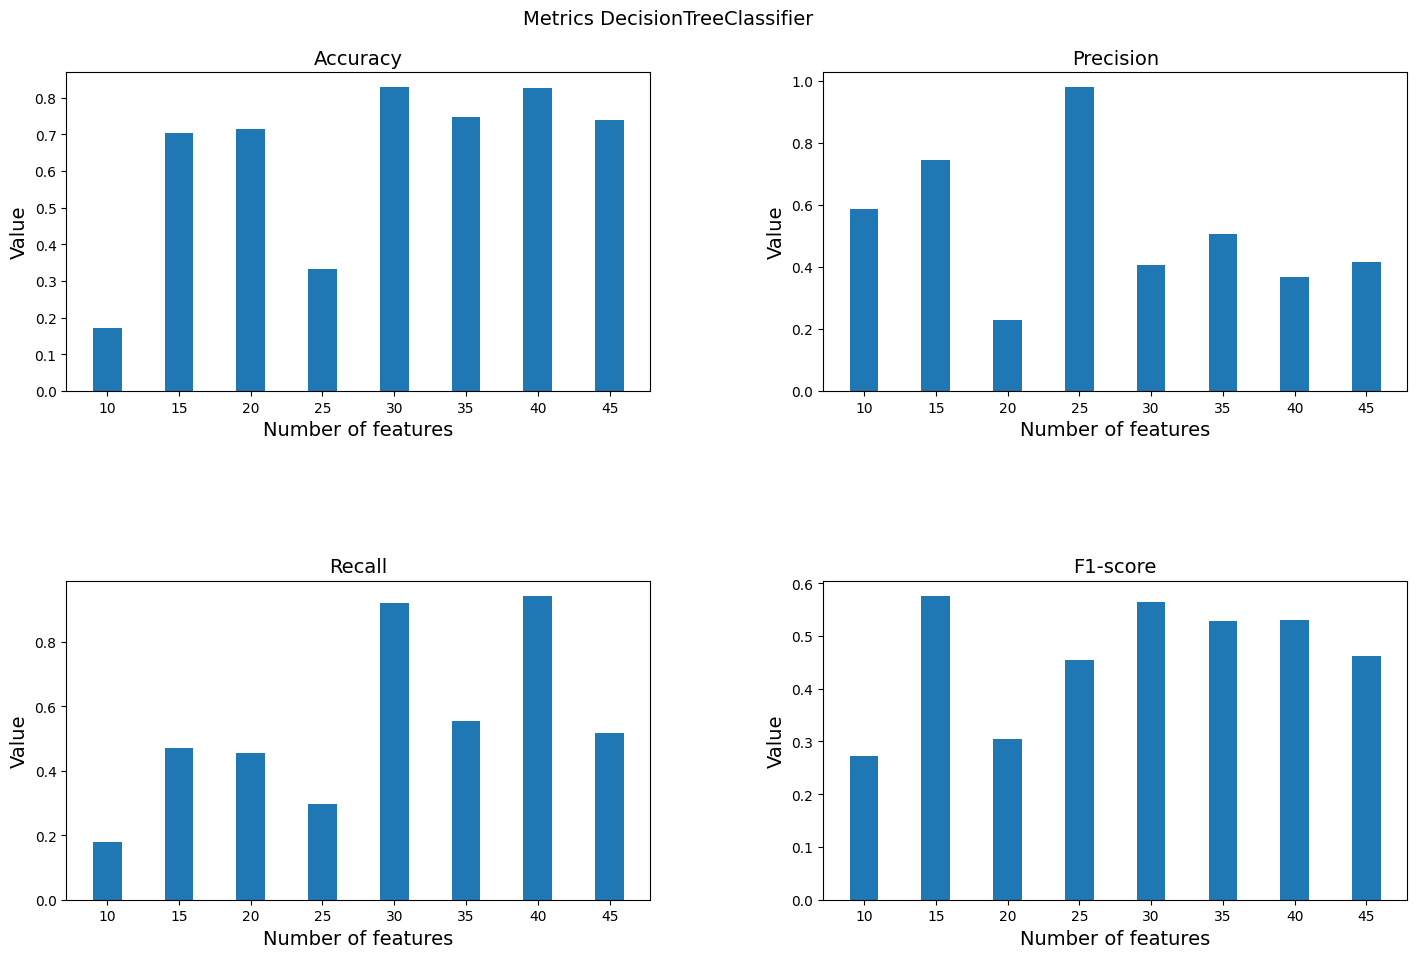

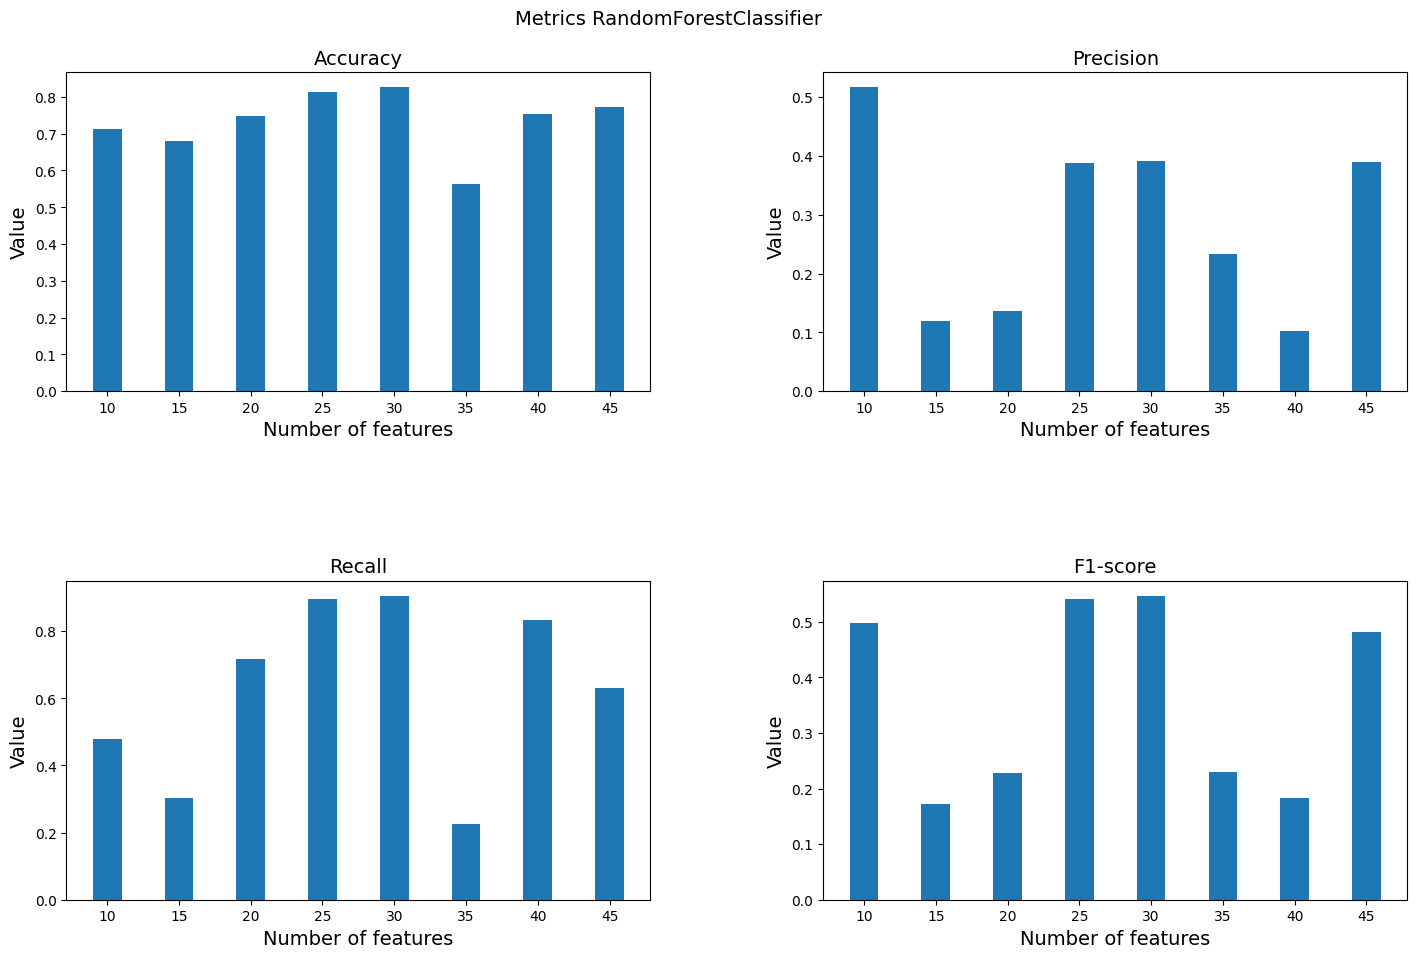

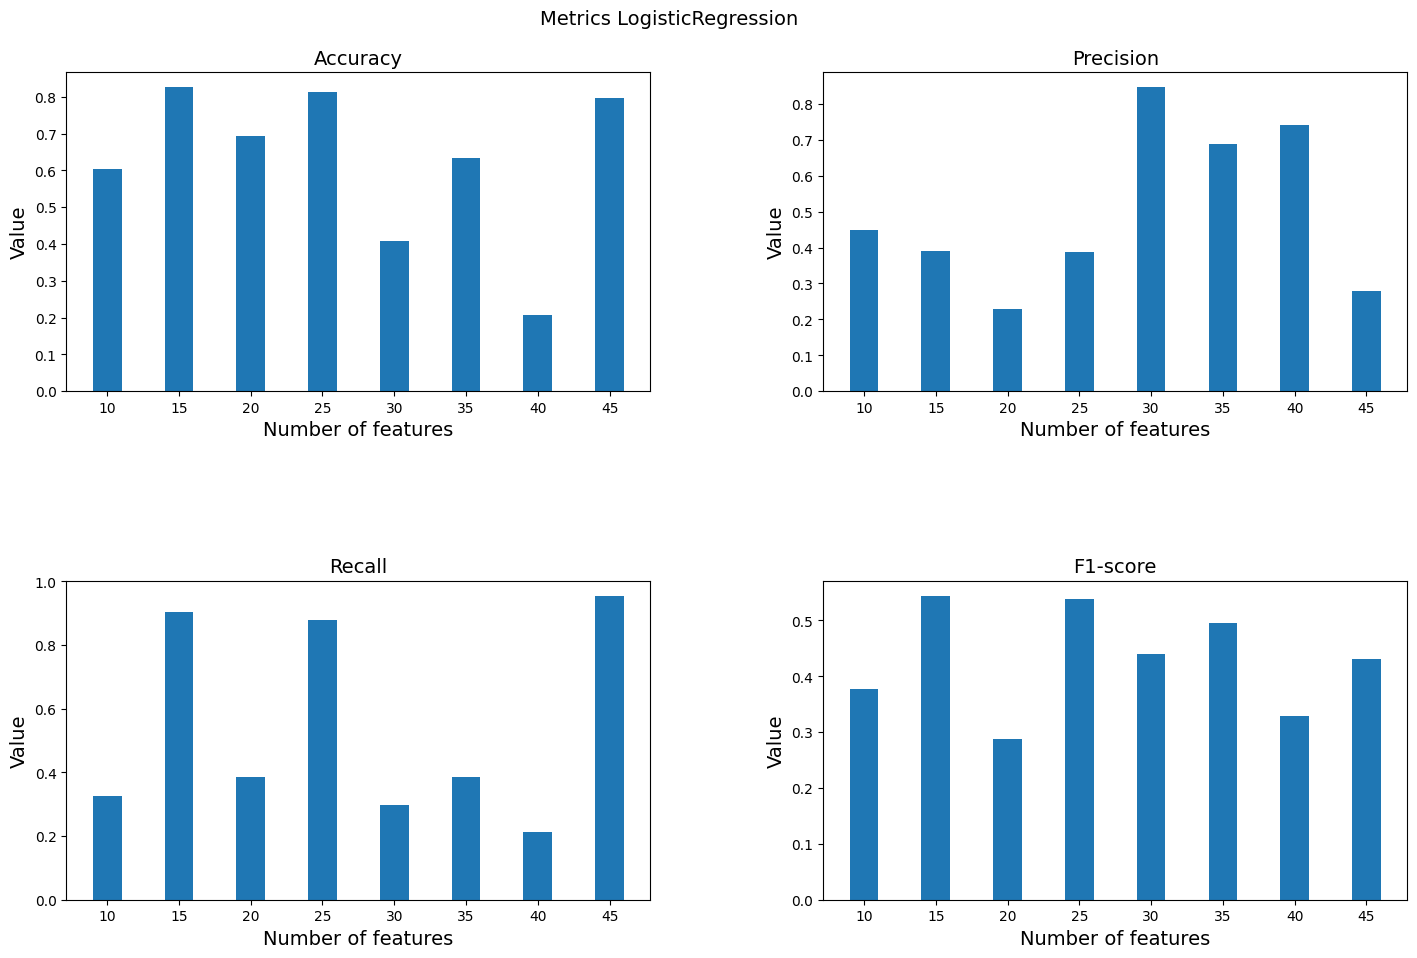

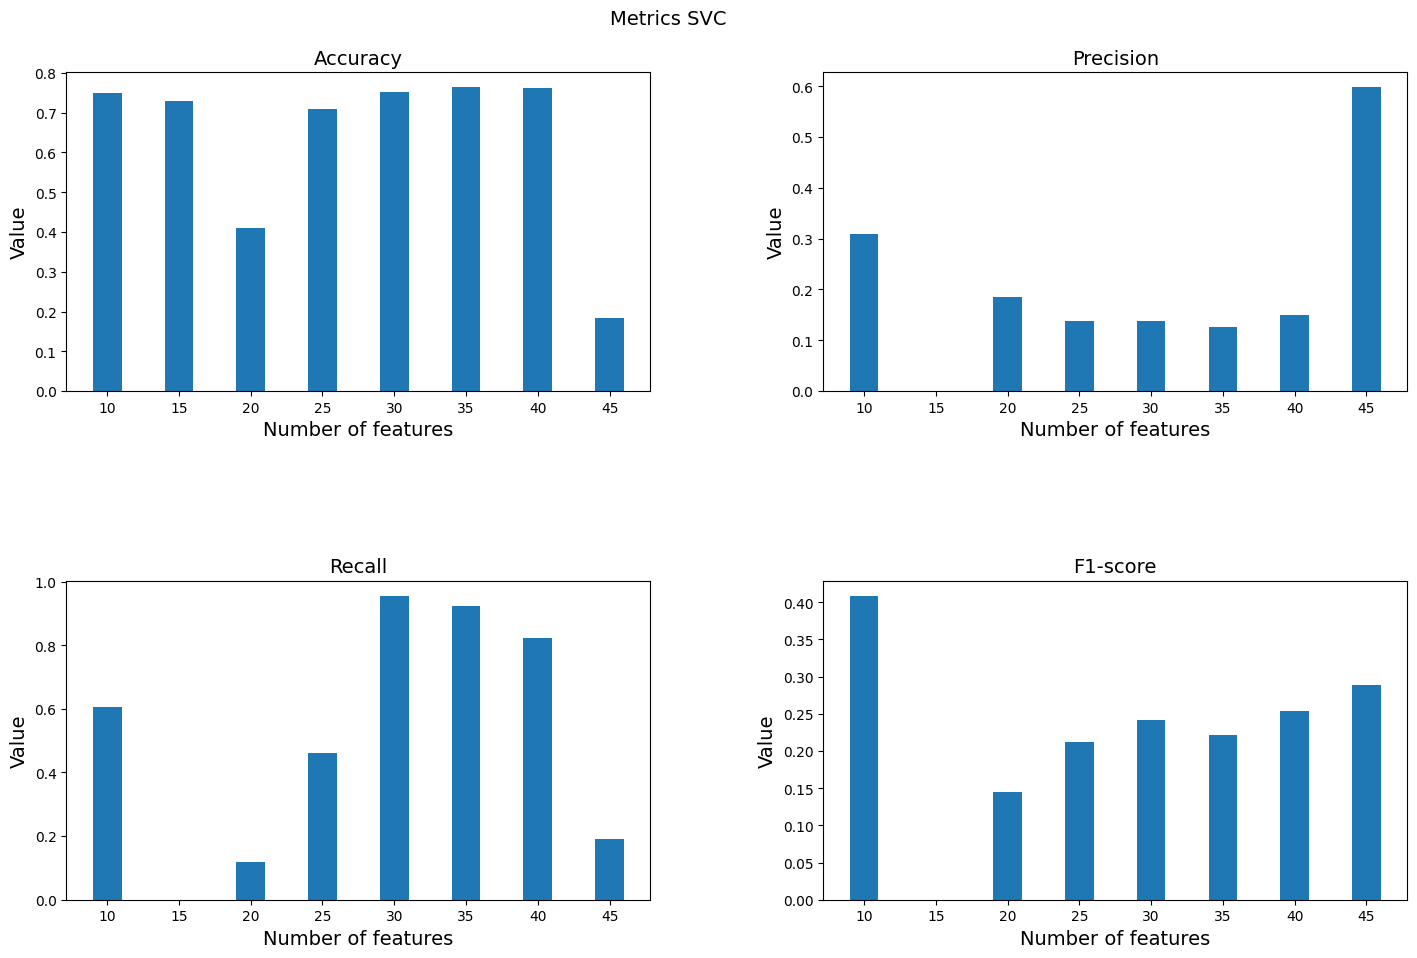

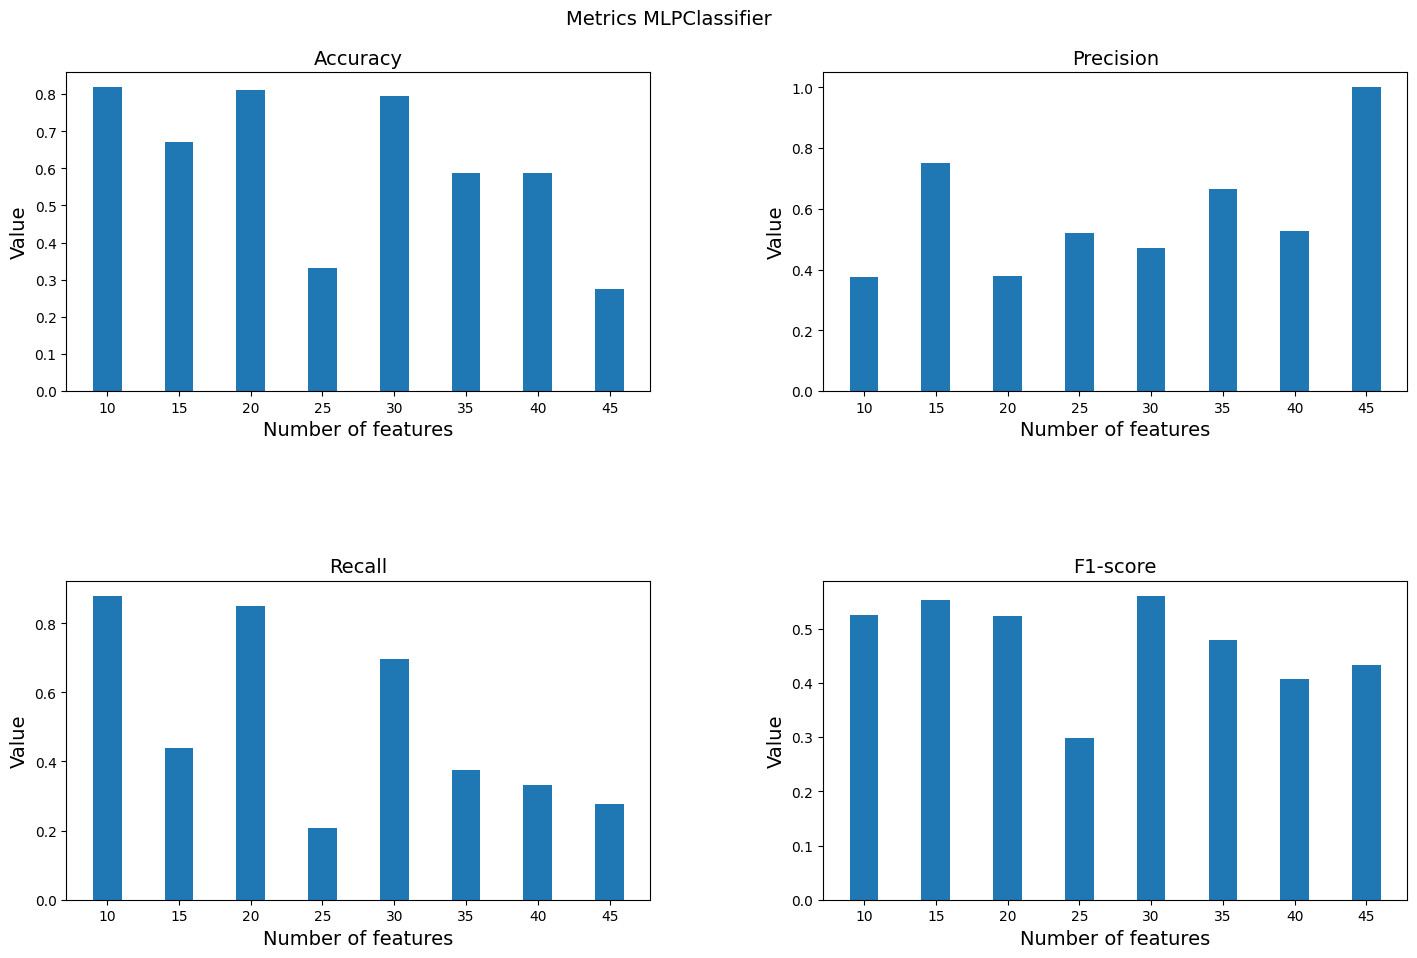

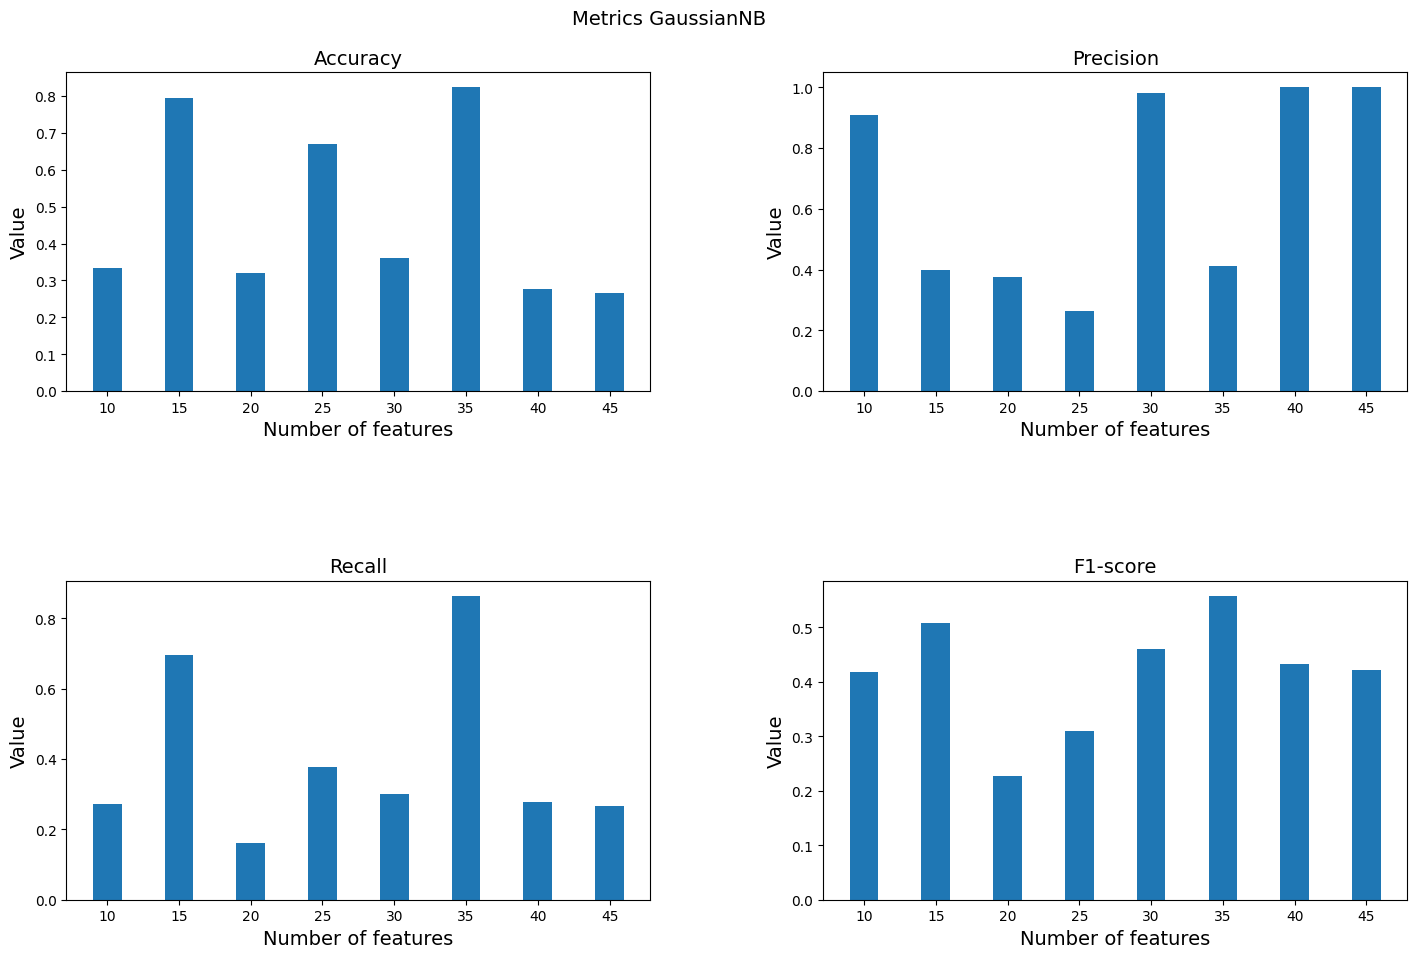

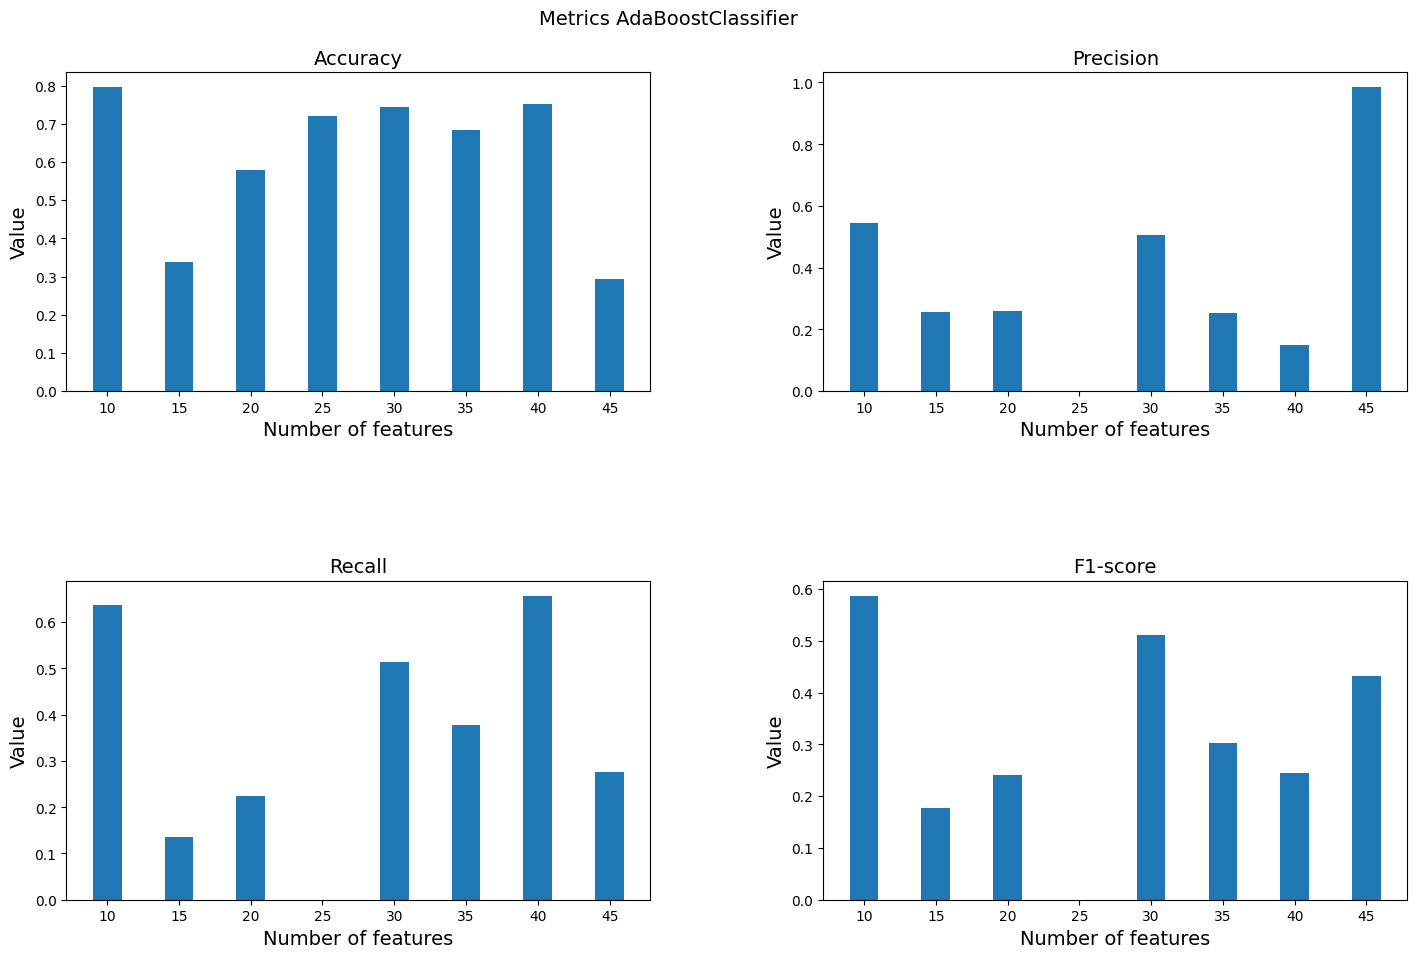

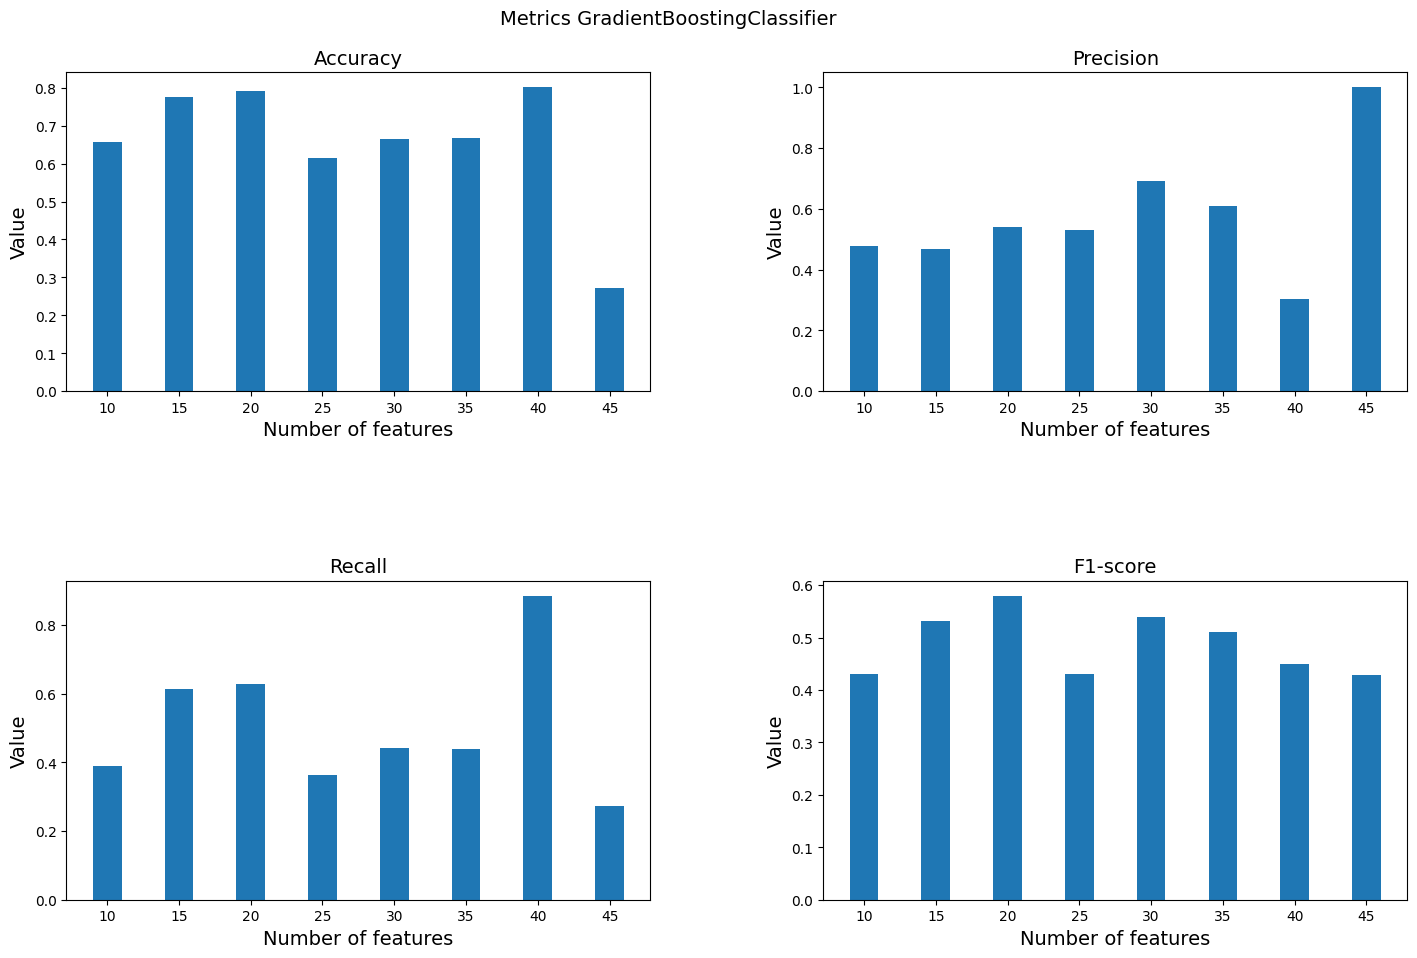

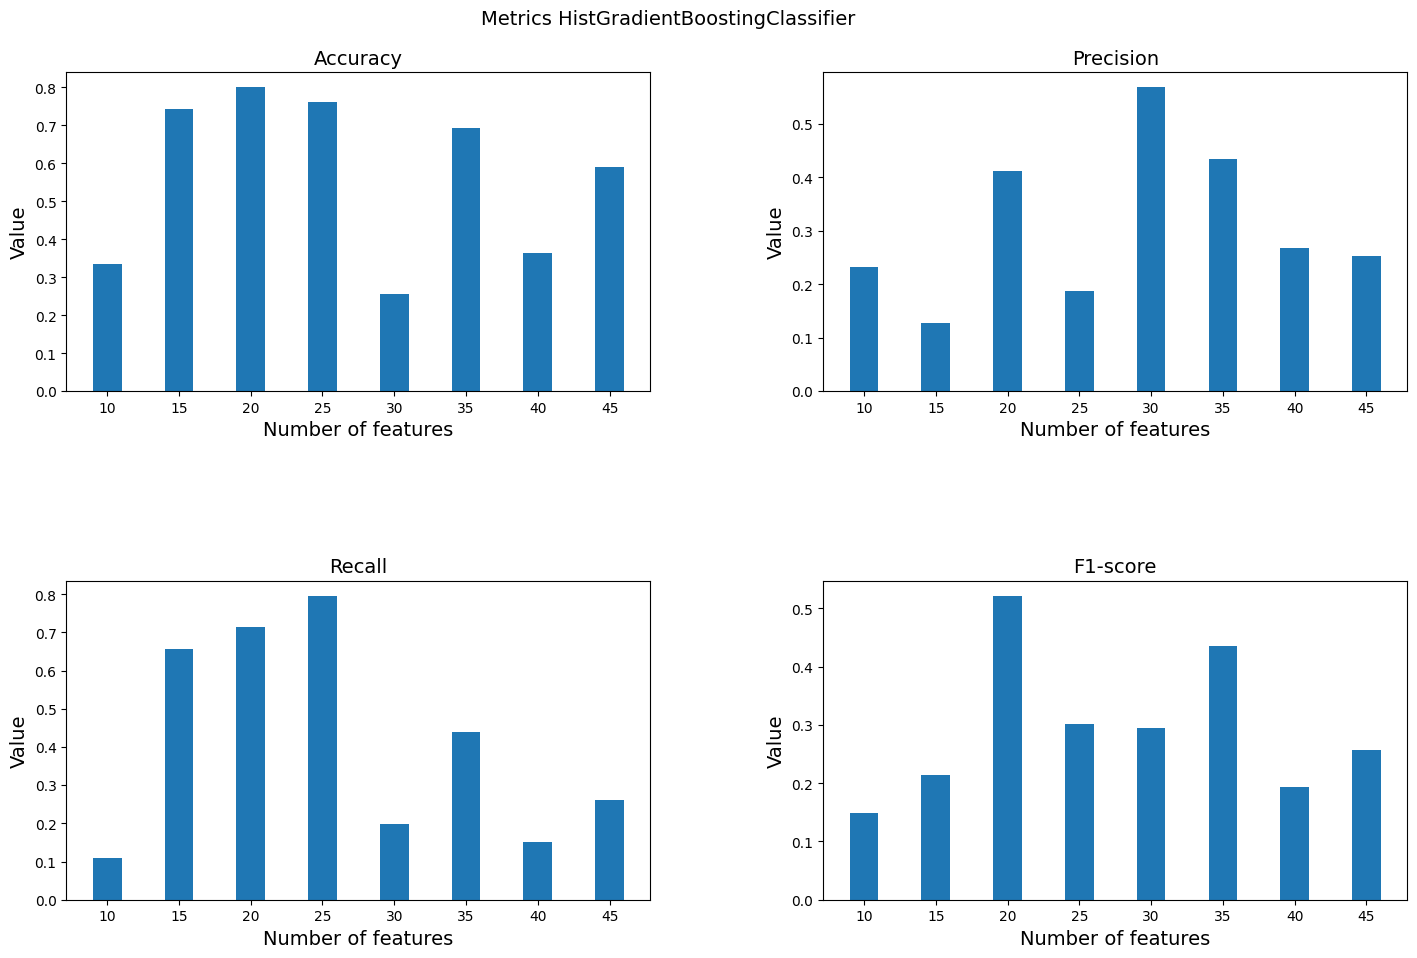

In [10]:
results_by_clf = {}
for clf in clfs:
    results_by_clf[clf] = [result for result in results if result.clf == clf]

    
for clf, result_by_clf in results_by_clf.items():
    clf_name = clf.__class__.__name__

    # Строим график столбцов
    accuracy_values = [result.accuracy for result in result_by_clf]
    precision_values = [result.precision for result in result_by_clf]
    recall_values = [result.recall for result in result_by_clf]
    f1_values = [result.f1 for result in result_by_clf]

    # Добавляем заголовок и подписи осей
    fig, axs = plt.subplots(2, 2)
    
    # Первый график
    axs[0, 0].bar(features_numbers, accuracy_values, width=2)
    axs[0, 0].set_title('Accuracy', fontsize=14)
    axs[0, 0].set_xlabel('Number of features', fontsize=14)
    axs[0, 0].set_ylabel('Value', fontsize=14)

    # Второй график
    axs[0, 1].bar(features_numbers, precision_values, width=2)
    axs[0, 1].set_title('Precision', fontsize=14)
    axs[0, 1].set_xlabel('Number of features', fontsize=14)
    axs[0, 1].set_ylabel('Value', fontsize=14)

    # Третий график
    axs[1, 0].bar(features_numbers, recall_values, width=2)
    axs[1, 0].set_title('Recall', fontsize=14)
    axs[1, 0].set_xlabel('Number of features', fontsize=14)
    axs[1, 0].set_ylabel('Value', fontsize=14)

    # Четвертый график
    axs[1, 1].bar(features_numbers, f1_values, width=2)
    axs[1, 1].set_title('F1-score', fontsize=14)
    axs[1, 1].set_xlabel('Number of features', fontsize=14)
    axs[1, 1].set_ylabel('Value', fontsize=14)

    # Настраиваем расположение графиков и добавляем общий заголовок
    fig.tight_layout()
    fig.suptitle(f'Metrics {clf_name}', fontsize=14)

    # Сохраняем график
    fig.set_size_inches(15.5, 10.5, forward=True)
    fig.savefig(f'metrics_clf/Metrics_{clf_name}.png', dpi=300)
    plt.show()

# Plot ROC curves

<Figure size 800x800 with 0 Axes>

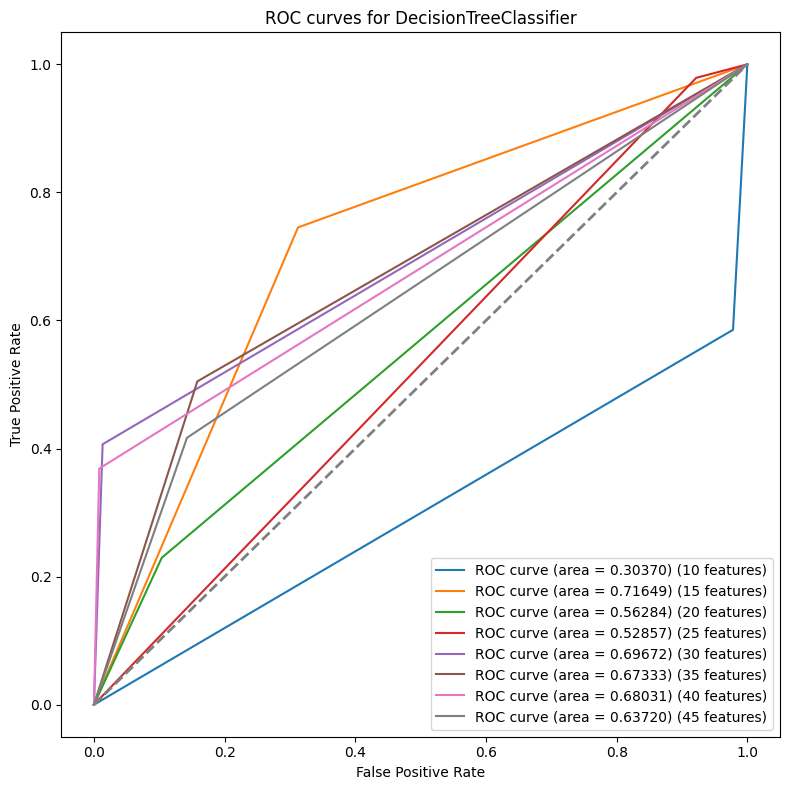

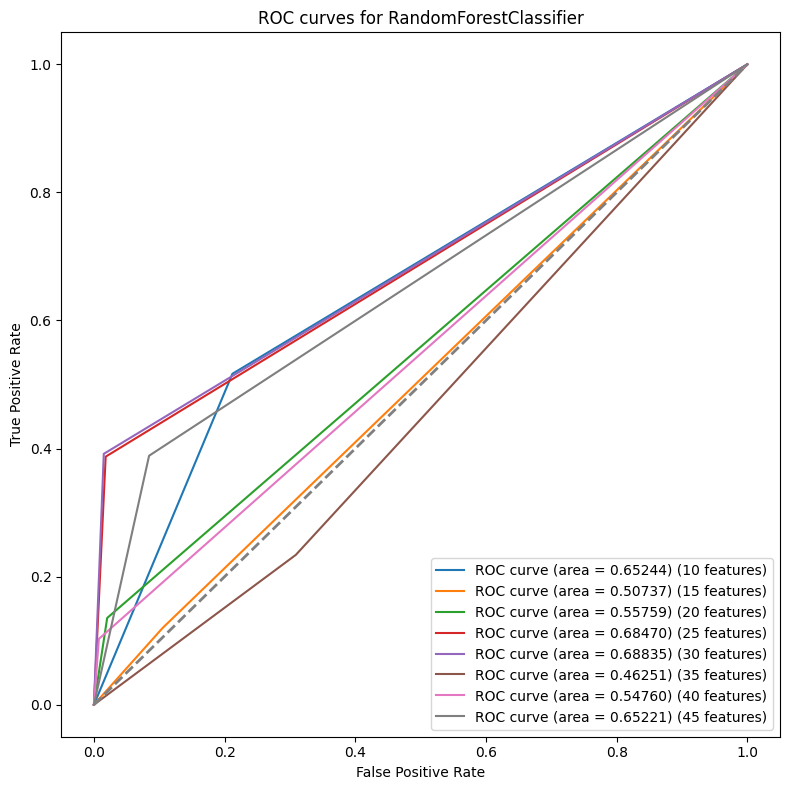

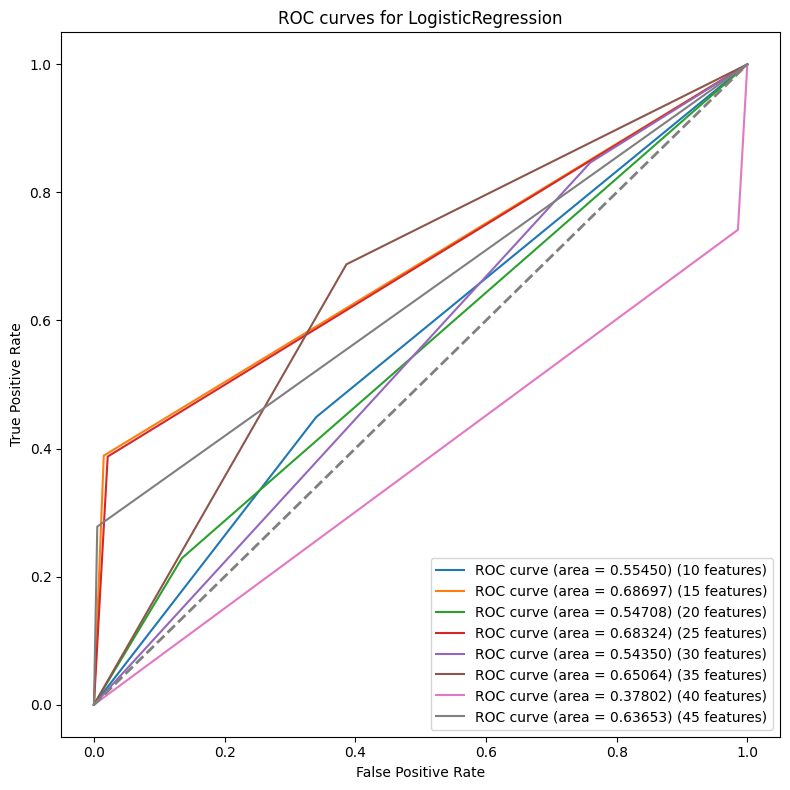

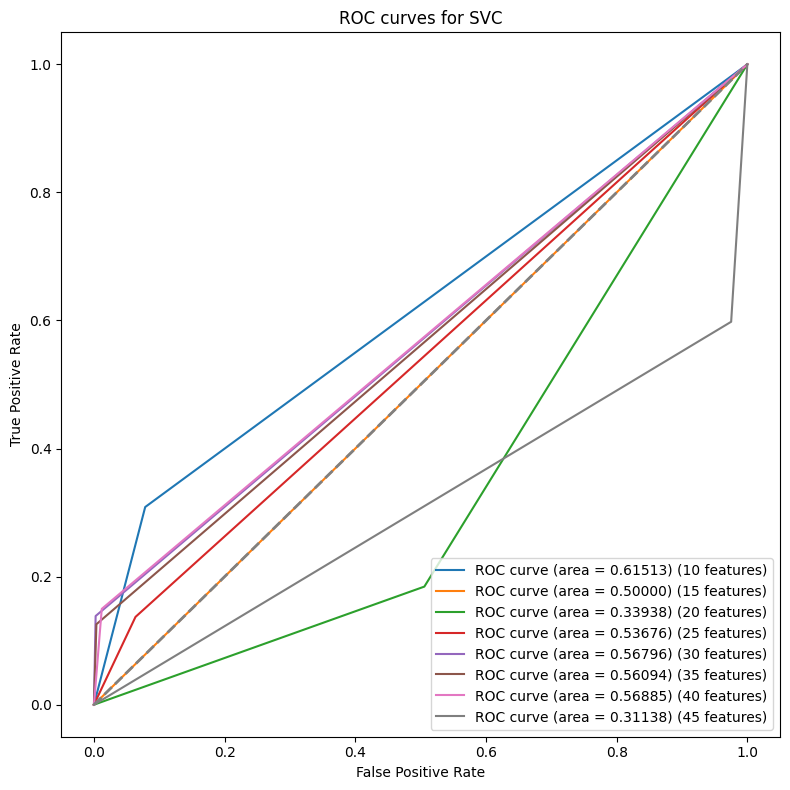

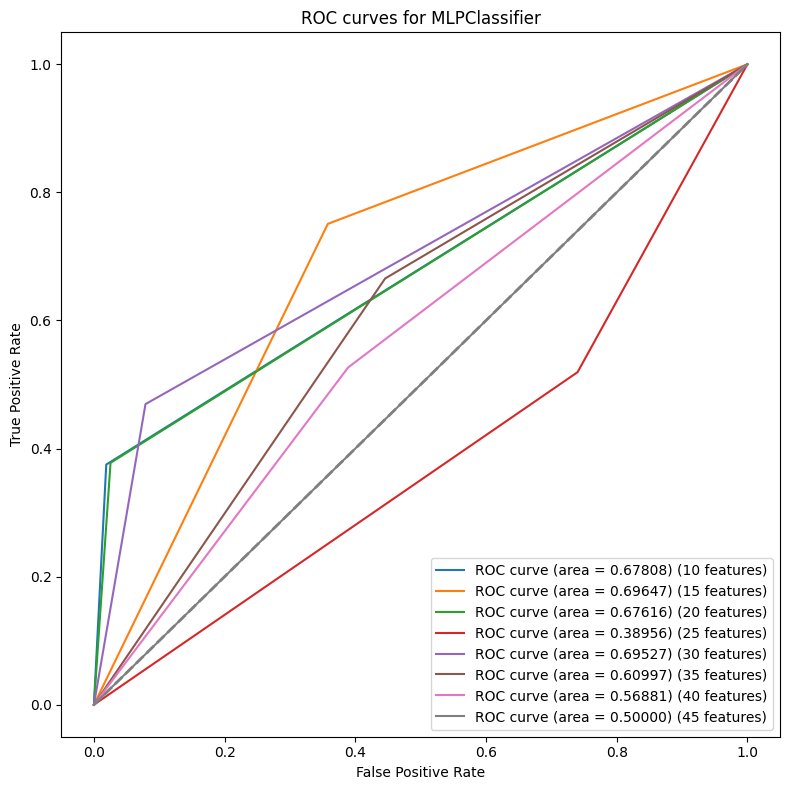

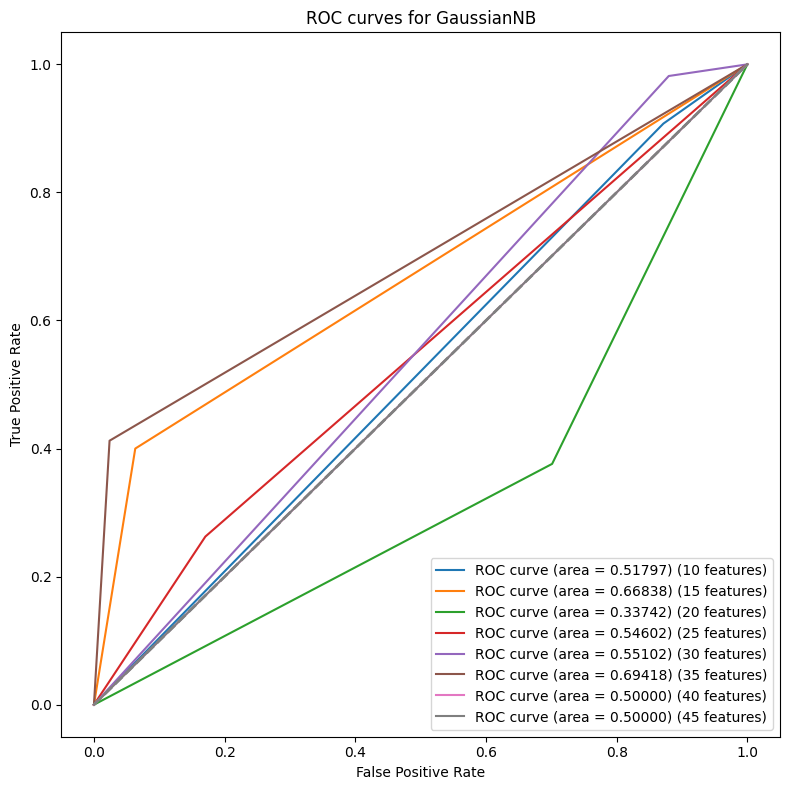

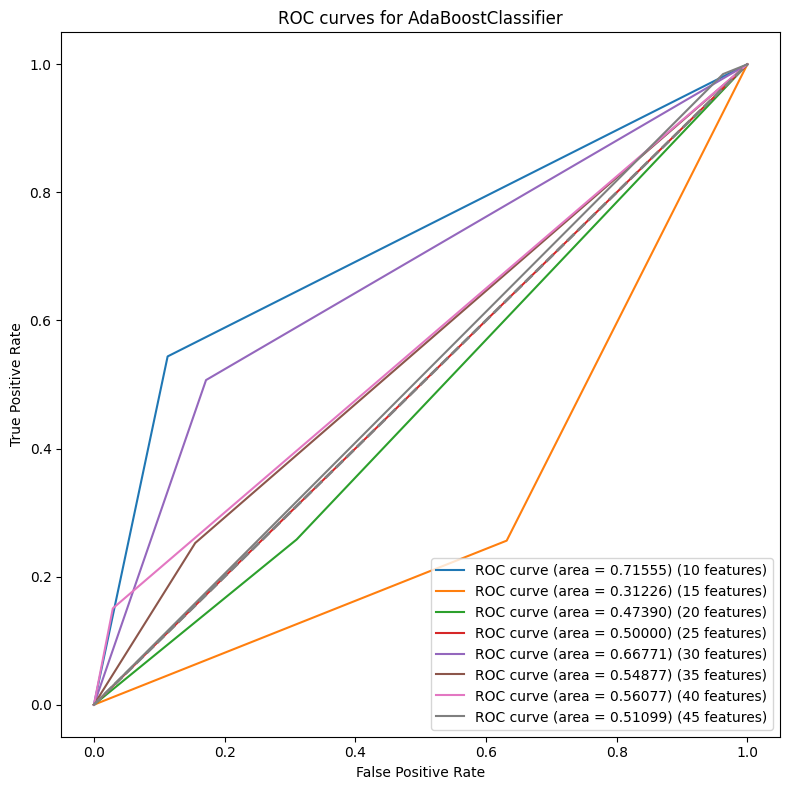

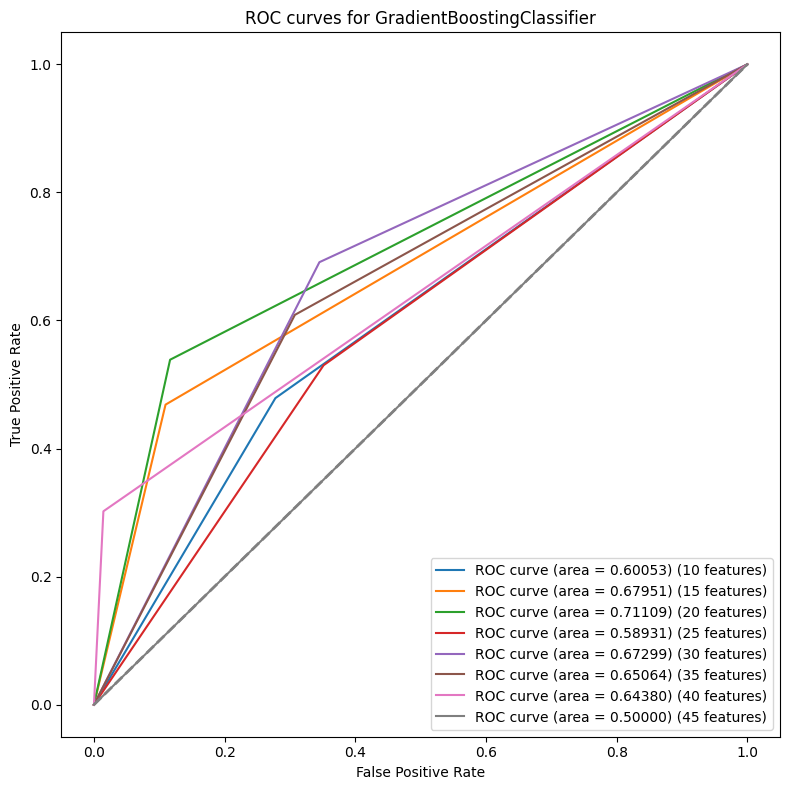

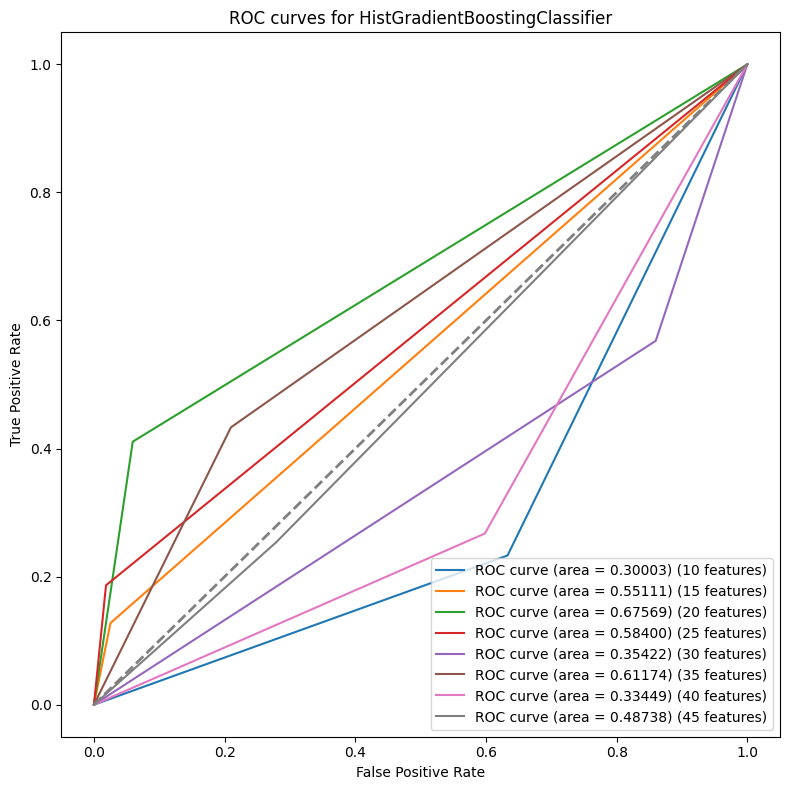

In [6]:
fig = plt.figure(figsize=(8, 8))

# Строим ROC кривые
for clf, result_by_clf in results_by_clf.items():
    fig = plt.figure(figsize=(8, 8))
    clf_name = clf.__class__.__name__
    for i in range(len(result_by_clf)):
        plt.plot(
            result_by_clf[i].fpr,
            result_by_clf[i].tpr,
            label=f'ROC curve (area = %0.5f) ({result_by_clf[i].selected_features_len} features)'% result_by_clf[i].auc
        )

    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curves for {clf_name}')
    plt.legend(loc="lower right")

    # Сохраняем график
    fig.tight_layout()
    plt.savefig(f'ROC_clf/ROC-curves_{clf_name}.png', dpi=300)
    plt.show()